
# Exploratory Data Analysis (EDA)
## Industrial Equipment Maintenance Prediction

This notebook performs Exploratory Data Analysis (EDA) on the Predictive Maintenance dataset.
The goal is to:
- Understand data structure
- Analyze target distribution
- Detect class imbalance
- Study feature distributions and correlations
- Identify trends useful for predictive maintenance


In [6]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


## Load Dataset

In [7]:
import sys
sys.path.append("..")

df = pd.read_csv("../data/Predictive_Maintenance_dataset.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Vibration Levels,Operational Hours,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,42.0,20.0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,52.0,21.0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,44.0,18.0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,52.0,10.0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,44.0,10.0,No Failure


## Dataset Overview

In [8]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      500 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              500 non-null    float64
 7   Vibration Levels         500 non-null    float64
 8   Operational Hours        500 non-null    float64
 9   Failure Type             500 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


In [9]:

df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Vibration Levels,Operational Hours
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,298.097800,308.576400,1540.494000,39.882800,36.904811,81.106840
std,144.481833,0.563071,0.345372,193.658248,9.768592,9.242797,45.904853
min,1.000000,297.200000,307.900000,1208.000000,4.200000,23.000000,10.000000
25%,125.750000,297.500000,308.300000,1424.750000,33.575000,31.183871,36.202500
50%,250.500000,298.100000,308.500000,1498.000000,40.350000,35.000000,77.575000
75%,375.250000,298.625000,308.800000,1604.500000,46.225000,44.000000,121.097500
max,500.000000,299.100000,309.500000,2874.000000,65.700000,55.000000,165.330000


## Missing Values Analysis

In [10]:

df.isnull().sum()


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Vibration Levels           0
Operational Hours          0
Failure Type               0
dtype: int64

## Target Variable Distribution

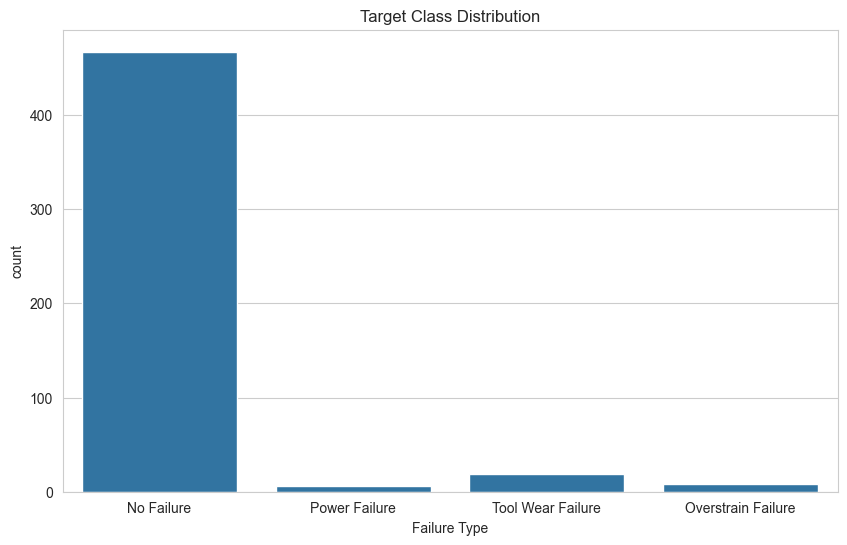

Failure Type
No Failure            0.934
Tool Wear Failure     0.038
Overstrain Failure    0.016
Power Failure         0.012
Name: proportion, dtype: float64


In [12]:
target_col = 'Failure Type'

sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()

print(df[target_col].value_counts(normalize=True))



**Insight:**  
This plot helps identify whether the dataset is imbalanced, which is common in predictive maintenance problems.


## Numerical Feature Distributions

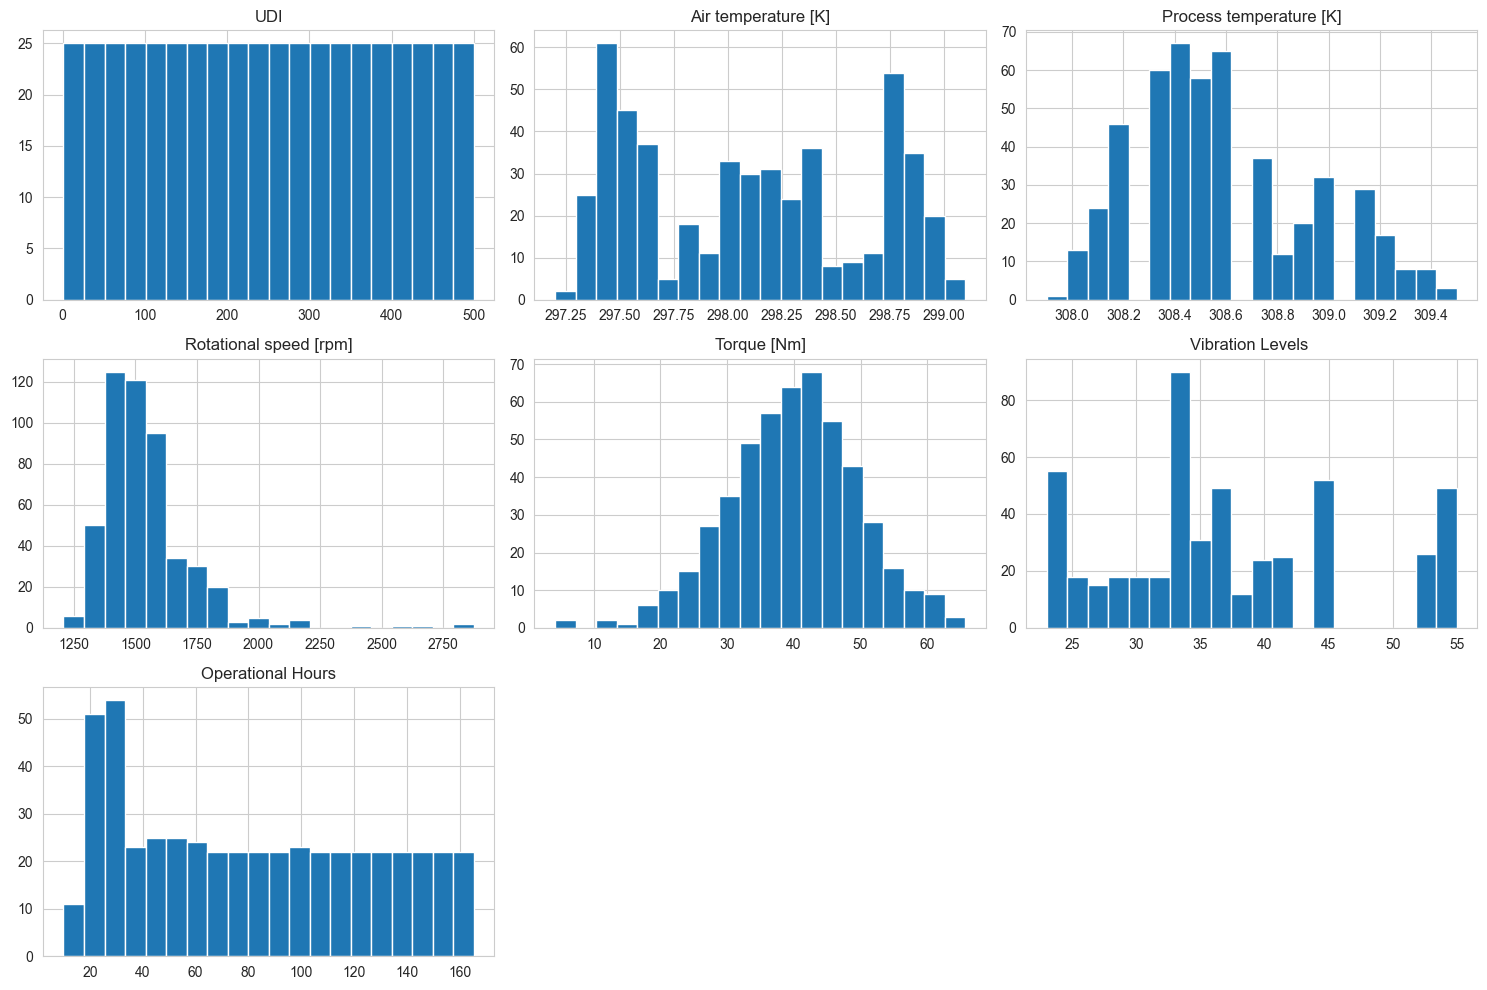

In [13]:

num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


## Categorical Feature Analysis

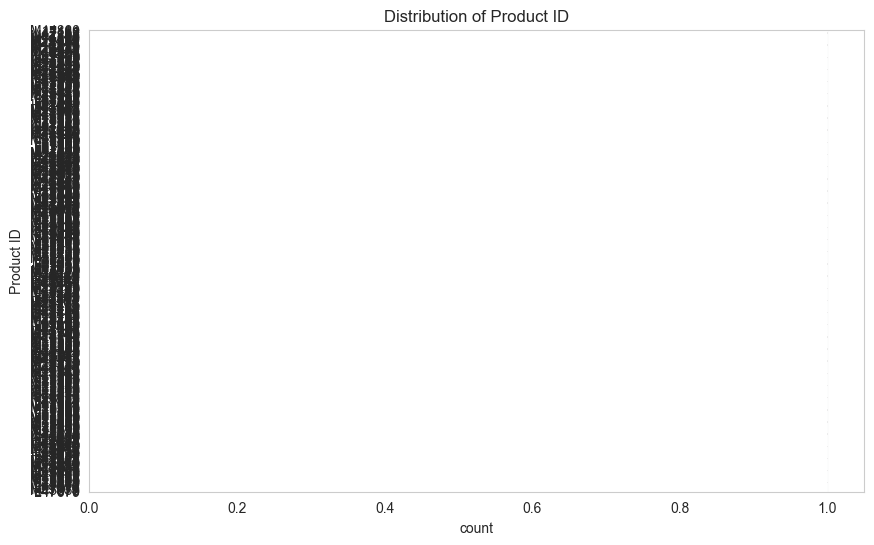

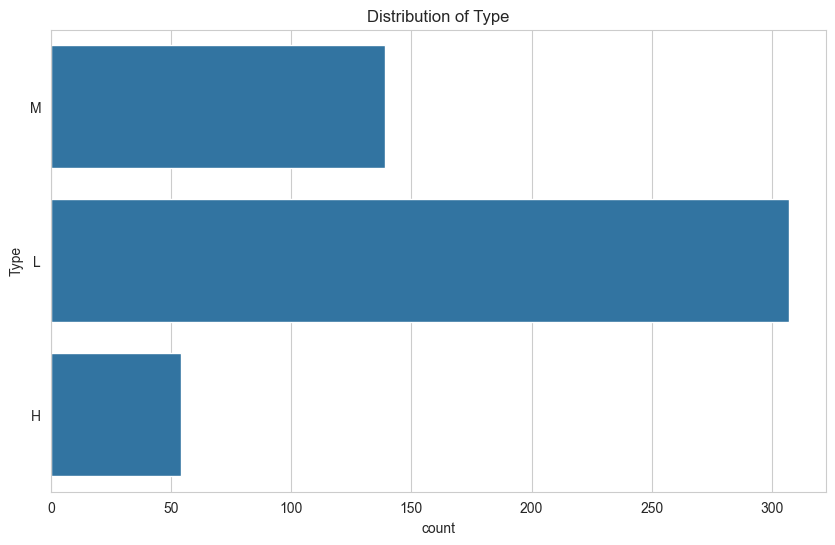

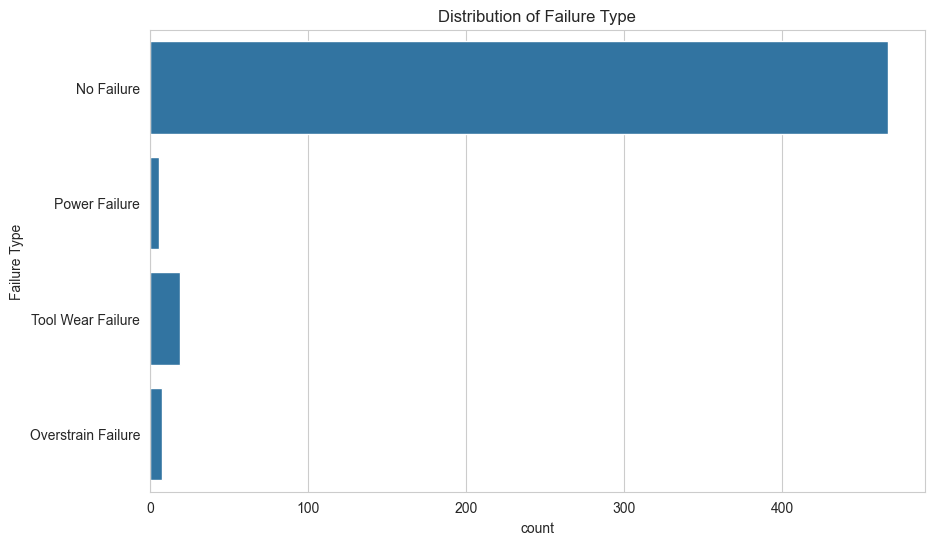

In [14]:

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


## Correlation Heatmap

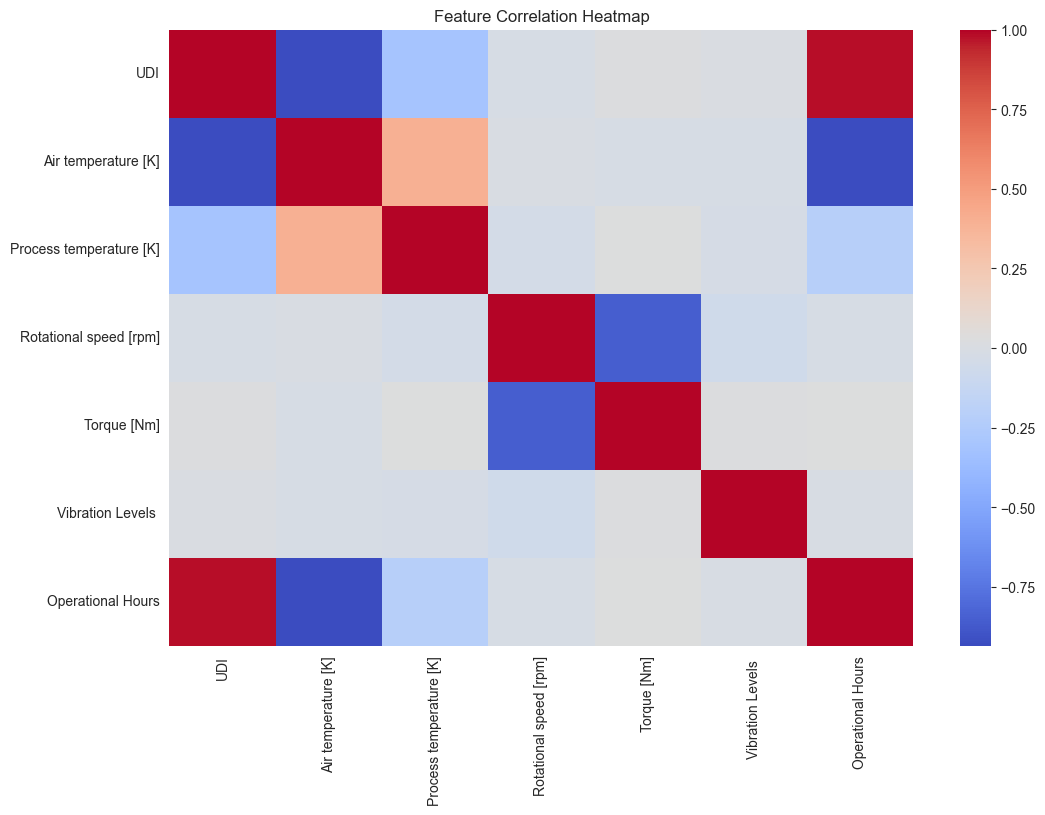

In [15]:

plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



**Insight:**  
Highly correlated features may indicate redundancy or strong relationships useful for failure prediction.


## Feature vs Target Analysis

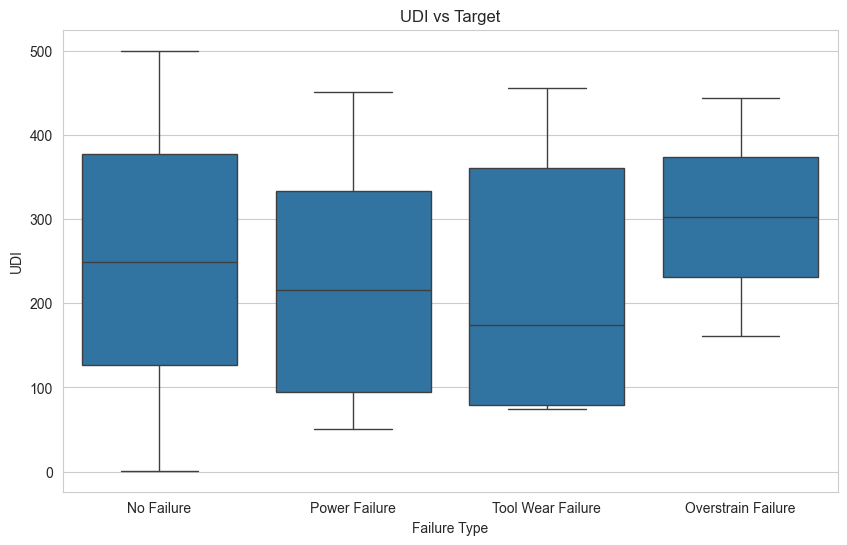

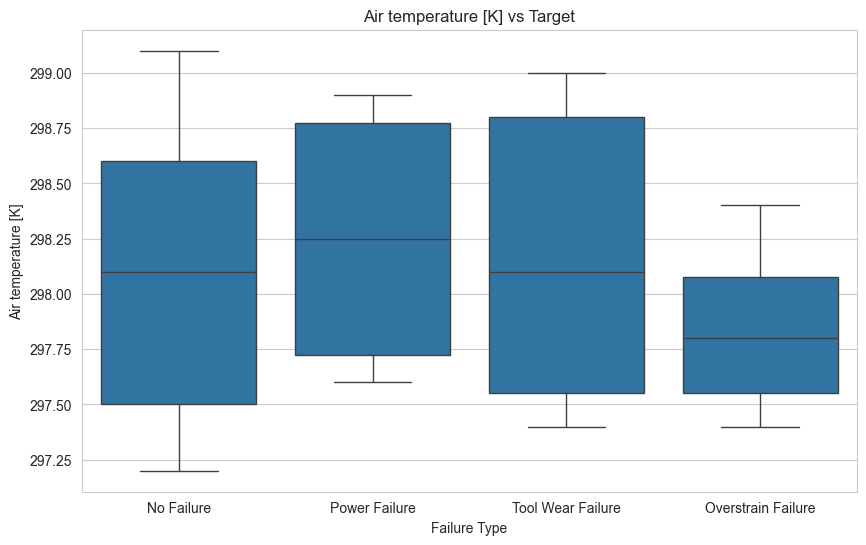

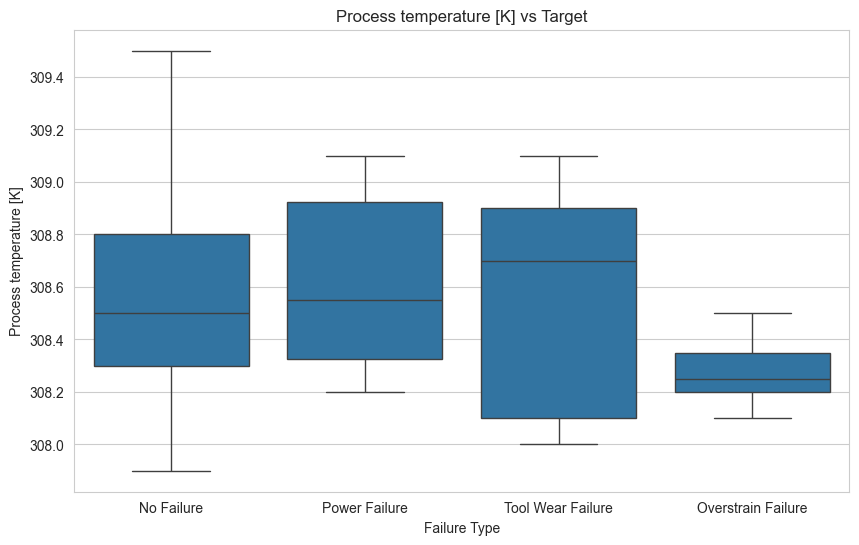

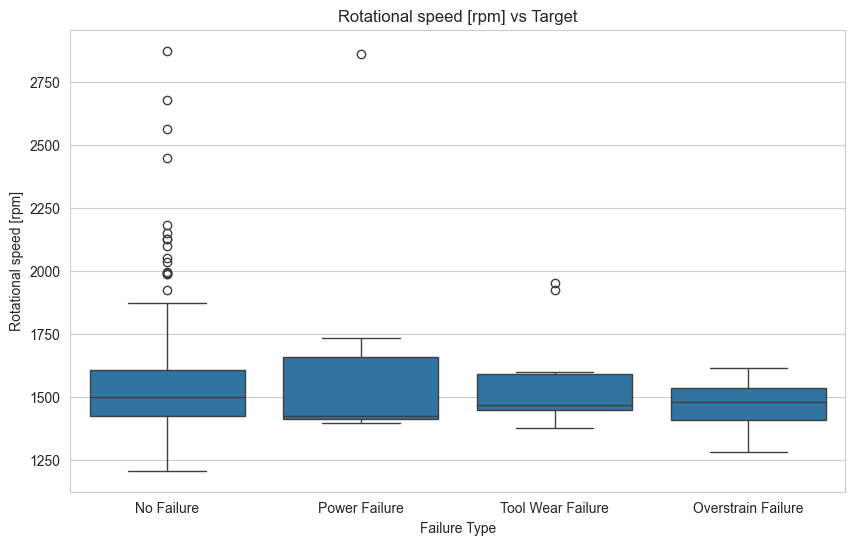

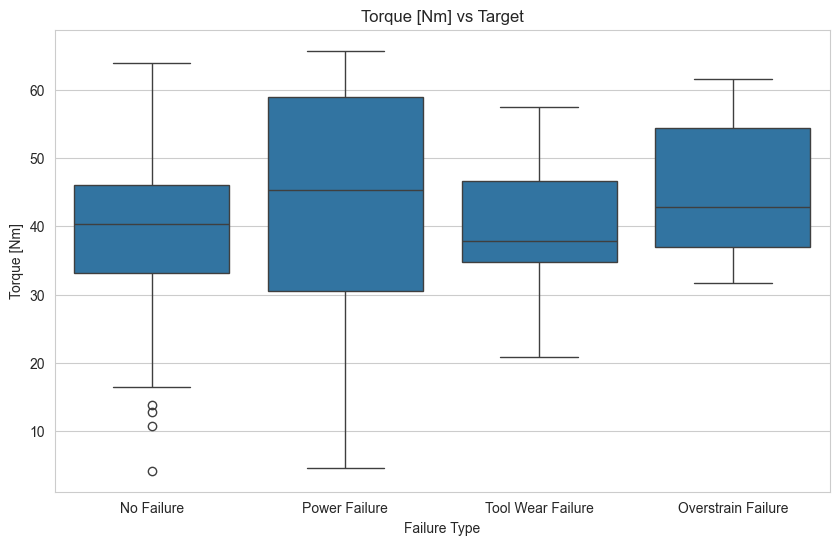

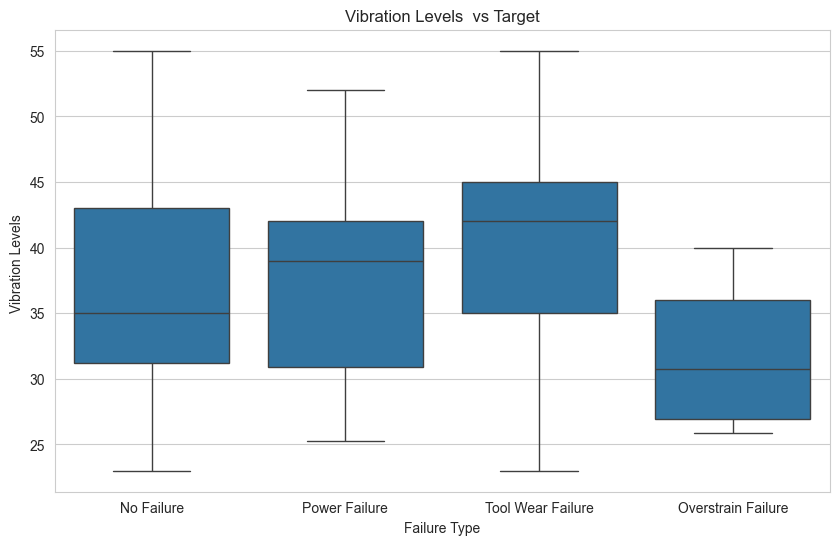

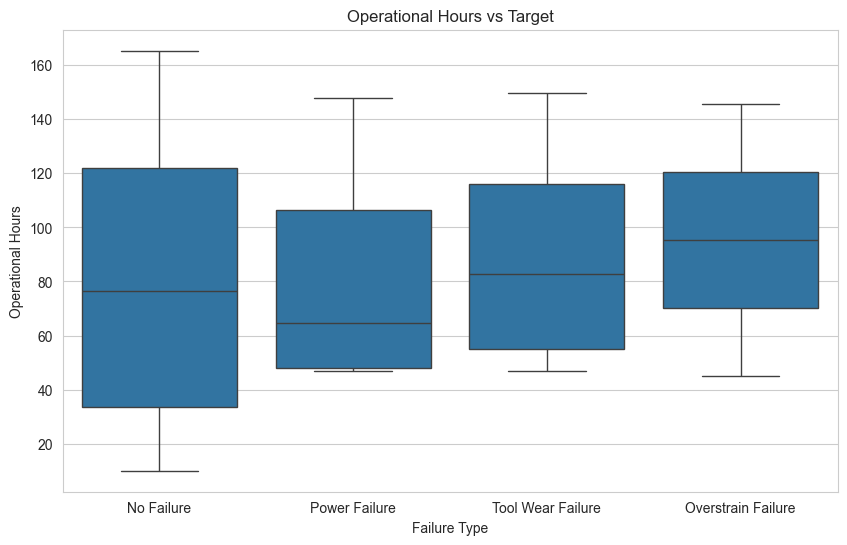

In [16]:

for col in num_cols:
    if col != target_col:
        plt.figure()
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f"{col} vs Target")
        plt.show()



**Insight:**  
Boxplots help identify which sensor readings differ significantly between failed and non-failed equipment.


## Additional Data Quality Checks

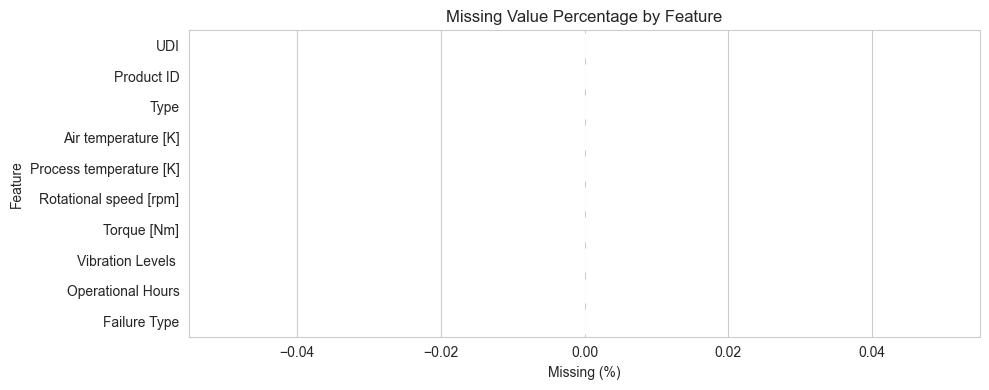

Duplicate rows: 0 (0.00% of dataset)


In [17]:
# Missingness and duplicates overview
missing_pct = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=missing_pct.values * 100, y=missing_pct.index, color="#4C72B0")
plt.xlabel("Missing (%)")
plt.ylabel("Feature")
plt.title("Missing Value Percentage by Feature")
plt.tight_layout()
plt.show()

dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count} ({dup_count/len(df):.2%} of dataset)")

## Outlier Overview (IQR-based)

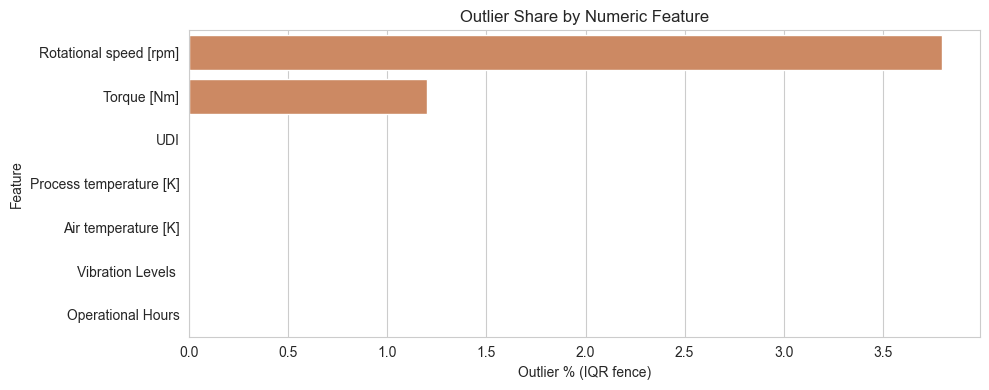

,feature,outlier_pct,count
3,Rotational speed [rpm],3.8,19
4,Torque [Nm],1.2,6
0,UDI,0.0,0
2,Process temperature [K],0.0,0
1,Air temperature [K],0.0,0


In [18]:
# Outlier share per numeric feature using IQR fences
outlier_stats = []
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_stats.append({
        "feature": col,
        "outlier_pct": mask.mean() * 100,
        "count": mask.sum()
    })

outlier_df = pd.DataFrame(outlier_stats).sort_values("outlier_pct", ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x="outlier_pct", y="feature", data=outlier_df, color="#DD8452")
plt.xlabel("Outlier % (IQR fence)")
plt.ylabel("Feature")
plt.title("Outlier Share by Numeric Feature")
plt.tight_layout()
plt.show()

outlier_df.head()

## Target vs Categorical Features (normalized)

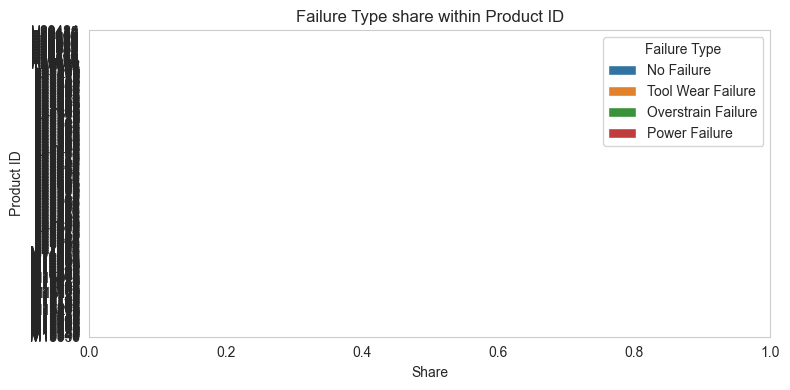

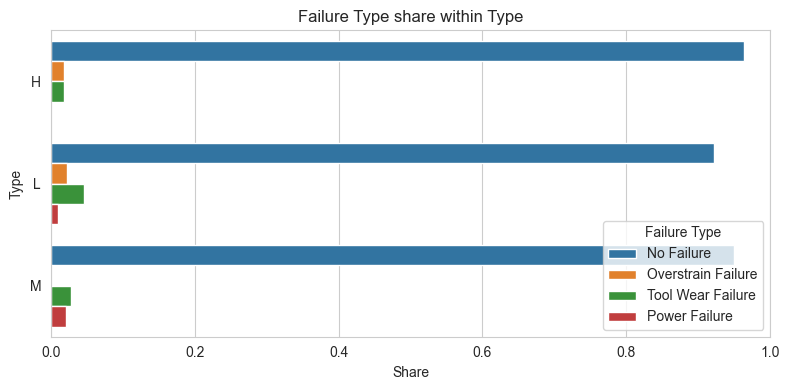

In [19]:
# Normalized distribution of failure types per categorical feature
for col in cat_cols:
    if col == target_col:
        continue
    ct = (df.groupby(col)[target_col]
            .value_counts(normalize=True)
            .rename("share")
            .reset_index())
    plt.figure(figsize=(8,4))
    sns.barplot(x="share", y=col, hue=target_col, data=ct)
    plt.title(f"{target_col} share within {col}")
    plt.xlabel("Share")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

## Pairwise Relationships (sampled)

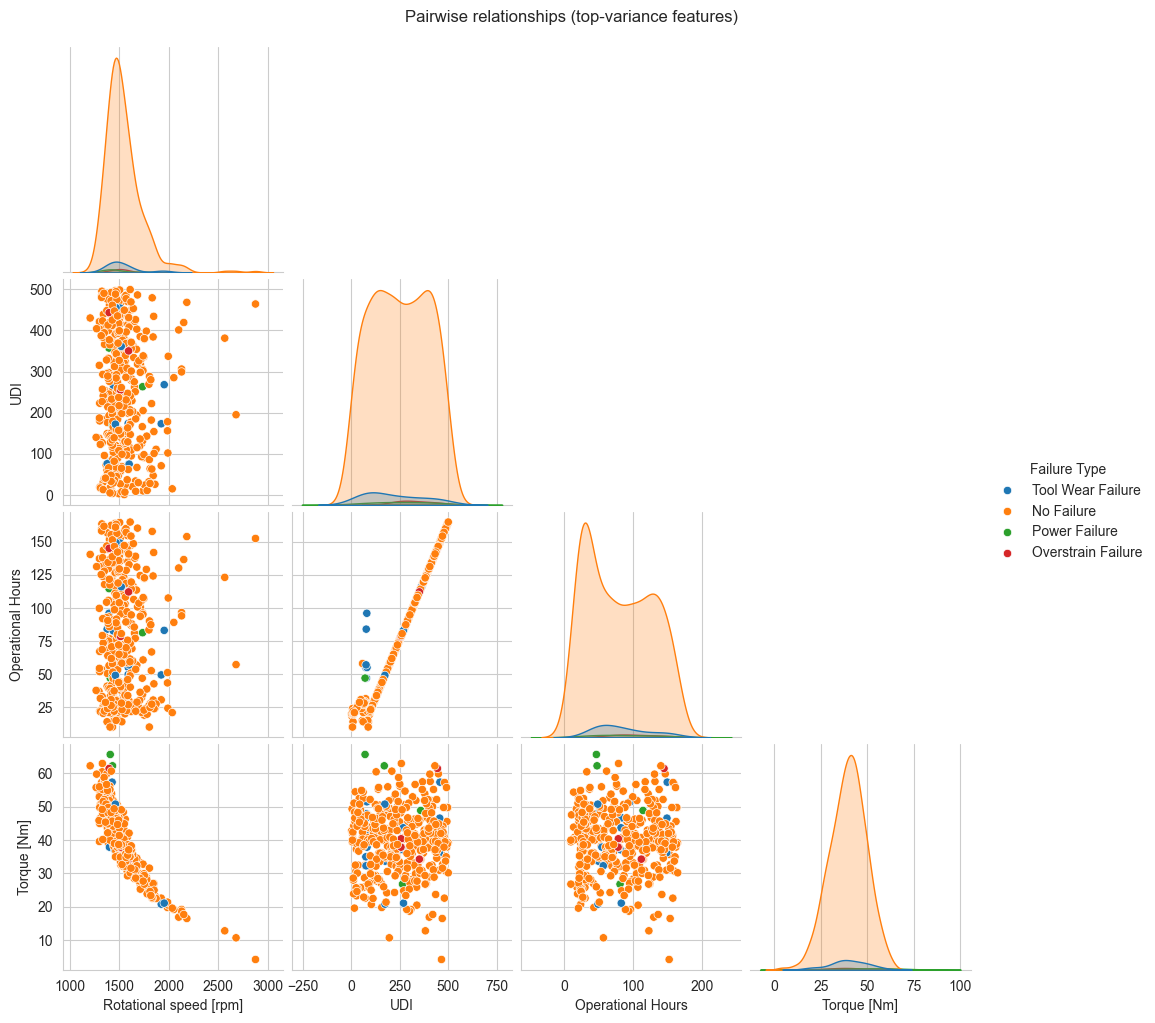

In [20]:
# Sample for lighter visualization
sample_df = df.sample(n=min(len(df), 400), random_state=42)

# Select up to 4 numeric columns with highest variance
var_cols = (sample_df[num_cols]
            .var()
            .sort_values(ascending=False)
            .head(4)
            .index.tolist())

if len(var_cols) >= 2:
    sns.pairplot(sample_df[var_cols + [target_col]], hue=target_col, diag_kind="kde", corner=True)
    plt.suptitle("Pairwise relationships (top-variance features)", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns for pairplot.")